<a href="https://datamics.com/de/courses/"><img src=../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>

***Hinweis:*** Zuvor sollte man die Binominalverteilung lernen.

## Poisson-Verteilung

Die Poisson-Verteilung ist eine Wahrscheinlichkeitsverteilung, mit der die Anzahl von Ereignissen modelliert werden kann, die bei konstanter mittlerer Rate unabhängig voneinander in einem festen Zeitintervall oder räumlichen Gebiet eintreten. Sie ist eine univariate diskrete Wahrscheinlichkeitsverteilung, die einen häufig vorkommenden Grenzwert der Binomialverteilung für unendlich viele Versuche darstellt. Sie lässt sich aber auch aus grundlegenden Prozesseigenschaften axiomatisch herleiten.

Die Zuwächse eines Poisson-Prozesses sind Poisson-verteilte Zufallsvariablen. Erweiterungen der Poisson-Verteilung wie die verallgemeinerte Poisson-Verteilung und die Gemischte Poisson-Verteilung werden vor allem im Bereich der Versicherungsmathematik angewendet. 

Wir schauen uns zunächst die Definition an, brechen auf was diese bedeudet, schauen uns ein Beispiel an und erzeugen die Poisson-Verteilung mit Scipy und Matplotlib

***Definition:*** Die Poisson-Verteilung Pλ ist eine diskrete Wahrscheinlichkeitsverteilung. Sie wird durch einen reellen Parameter λ > 0 bestimmt, der den Erwartungswert und gleichzeitig die Varianz der Verteilung beschreibt. Sie ordnet den natürlichen Zahlen k = 0 , 1 , 2 , … die Wahrscheinlichkeiten 

$$Pλ(X=k)=\frac{\lambda^ke^{-\lambda}}{k!}$$

zu, wobei e die eulersche Zahl (e=2.718...) und k! die Fakultät von k bezeichnet. Der Parameter λ beschreibt anschaulich die bei einer Beobachtung erwartete Ereignishäufigkeit. Die Poisson-Verteilung gibt dann die Wahrscheinlichkeit einer bestimmten Ereignisanzahl k im Einzelfall an, wenn die mittlere Ereignisrate λ bekannt ist. 

Die Poisson-Verteilung hat die folgenden Eigenschaften:

    1.) Diskrete Ergebnisse (x=0,1,2,3...)
    2.) Die Anzahl der Ereignishäufigkeit kann theoretisch von 0 bis unendlich reichen.
    3.) Sie beschreibt die Verteilung von seltenen Ereignissen.
    4.) Jedes Ereignis ist unabhängig von den anderen.
    5.) Beschreibt diskrete Ereignisse über ein Zeit- oder Distanzinterval.
    6.) Die erwartete Ereignishäufigkeit E(X) wird während des Experiments als konstant angenommen.

##### Wie sieht dazu ein Beispiel aus?

Nehmen wir an, eine Pizzaria hat eine Mittagszeit von 12:30 bis 13:00 Uhr an der die meisten Kunden kommen. Wenn wir auf die Verkaufsdaten der Vortage schauen, erkennen wir dass durchschnittlich 10 Kunden zwischen 12:30 und 13:00 Uhr kommen. Wie hoch ist die Wahrscheinlichkeit dass *genau* 7 Kunden während dieser Zeit kommen? Wie hoch ist die Wahrscheinlichkeit dass *mehr als* 10 Kunden kommen?


Überlegen wir uns zunächst wie viele Kunden wir erwarten die zur Mittagszeit in die Pizzeria kommen. Nun, diese Information haben wir schon, nämlich 10. Da der Durchschnitt 10 ist, ist auch unser erwarteter Wert E(x) = 10. In der Poisson-Verteilung ist das λ. 

Nachdem wir jetzt den Wert für λ kennen, können wir diese für die Wahrscheinlichkeitsfunktion (en. probability mass function) verwenden und die Fragen beantworten. Dazu verwenden wir Python und beginnen mit der ersten Frage: "Wie hoch ist die Wahrscheinlichkeit dass genau 7 Kunden während dieser Zeit kommen?"

Hinweis: "lambda" sollte nicht als Objektname verwendet werden, da es schon eine eingebaute Pythonfunktion ist!

In [1]:
# Definiere lambda
lamb = 10

# Definiere k mit der Anzahl der Ereignisse
k=7

# Initialisiere und factorial math statements
from math import exp
from math import factorial

# Erstelle die Wahrscheinlichkeitsfunktion (probability mass function) 
prob = (lamb**k)*exp(-lamb)/factorial(k)

# Ausgabe
print (' Die Wahrscheinlichkeit dass genau 7 Kunden während der Mittagszeit kommen ist %2.2f %%' %(100*prob))

 Die Wahrscheinlichkeit dass genau 7 Kunden während der Mittagszeit kommen ist 9.01 %


### Poisson-Verteilung mit Scipy

Nachdem wir die Wahrscheinlichkeitsfunktion manuell erstellt haben können wir diese jetzt automatisch mit Scipy erstellen.

In [2]:

from scipy.stats import poisson

# Setzte den Druchschnitt = 10 Kundne für das Mittagsessen
mu = 10

# Dann können wir den Durchschnitt und die Varianz auslesen
mean,var = poisson.stats(mu)

# Wir können die Wahrscheinlichkeitsfunktion auch für bestimmte Punkte berechnen 
odds_seven = poisson.pmf(7,mu)

#Ausgabe
print ('Die Wahrscheinlichkeit dass genau 7 Kunden während der Mittagszeit kommen ist %2.2f %%'  %(100*odds_seven))

print ('Der Durchschnitt ist %2.2f ' %mean)

Die Wahrscheinlichkeit dass genau 7 Kunden während der Mittagszeit kommen ist 9.01 %
Der Durchschnitt ist 10.00 


Super! Unsere manuelle Berechnung stimmt mit der eingebauten Berechnung von Scipy überein. 

Jetzt schauen wir uns die ganze Verteilung an, da wir die Informationen zur Beantwortung der zweiten Frage benötigen.


In [3]:
import numpy as np

# Schauen wir uns die Wahrscheinlichkeitsfunktion für 30 Kunden an  
# Zur Erinnerung, es können theoretisch unendlich viele Kunden kommen 
k=np.arange(30)

# Der Durchschnitt ist 10 Kunden für dieses Zeitinterval 
lamb = 10

# Erstelle die Wahrscheinlichkeitsfunktion für den Plot
pmf_pois = poisson.pmf(k,lamb)


Wir verwenden Seaborn mit einem einfachen Balkendiagram

<Container object of 30 artists>

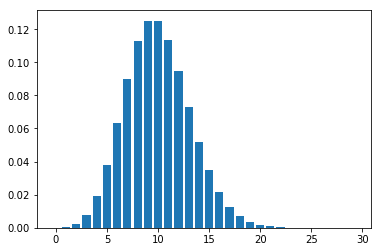

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.bar(k,pmf_pois)

***Zur Frage:*** "Wie hoch ist die Wahrscheinlichkeit dass mehr als 10 Kunden kommen?" Dazu müssen wir die Werte von jeden Balken nach 10 aufsummieren.  

Dazu können wir eine Verteilungsfunktion (Cumulative Distribution Function) verwenden. Jeder Wahrscheinlichkeitsverteilung (wie in diesem Fall die Poisson-Verteilung) und jeder reellwertigen Zufallsvariable kann eine Verteilungsfunktion zugeordnet werden. Anschaulich entspricht dabei der Wert der Verteilungsfunktion an der Stelle x der Wahrscheinlichkeit, dass die zugehörige Zufallsvariable X einen Wert kleiner oder gleich x annimmt. Ist beispielsweise die Verteilung der Schuhgrößen in Europa gegeben, so entspricht der Wert der entsprechenden Verteilungsfunktion bei 45 der Wahrscheinlichkeit, dass ein beliebiger Europäer die Schuhgröße 45 oder kleiner besitzt. 

Dies bedeutet dass wenn wir die CDF verwenden um die Wahrscheinlichkeit von 10 oder weniger Kunden die kommen zu zeigen, können diese Wahrscheinlichkeit nehmen und von dem gesamten Wahrscheinlichkeitsraum subtrahieren. Dieser Wahrscheinlichkeitsraum ist 1, die Summe aller Wahrscheinlichkeiten für jede Anzahl an Kunden.

Scipy hat dafür schon eine eingebaute Funktion die wir verwenden:

In [5]:
# k = 10 Kunden, mean = 10 für den Durchschnitt von Zehn Kunden währen des Zeitintervals 
k,mu = 10,10

# Die Wahrscheinlichkeit dass 10 oder weniger Kunden kommen: 
prob_up_to_ten = poisson.cdf(k,mu)

# Ausgabe
print ('Die Wahrscheinlichkeit dass 10 oder weniger Kunden kommen ist die folgende %2.1f %%.' %(100*prob_up_to_ten))

Die Wahrscheinlichkeit dass 10 oder weniger Kunden kommen ist die folgende 58.3 %.


Jetzt müssen wir noch die Frage für *mehr als* 10 Kunden beantworten. 

In [8]:
prob_more_than_ten = 1 - prob_up_to_ten

print 'Die Wahrscheinlichkeit dass mehr als 10 Kunden kommen ist die folgende %2.1f %%.' %(100*prob_more_than_ten)

-----

##### Das war eine kurze Übersicht zur Poisson-Verteilung.

Es gibt noch sehr viel mehr Literatur zur Poisson-Verteilung, die du dir anschauen kannst. Hier sind ein Paar Links zu weiteren Erklärungen:

1.)https://de.wikipedia.org/wiki/Poisson-Verteilung

2.)https://www.mathi.uni-heidelberg.de/~thaeter/stochastik08/poissonLu02.pdf

3.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

# Gut gemacht!